# Data Mining Process 
Goal of this lecture is to understand and implement the entire data mining process chain according to the [Cross-industry standard process (CRISP)](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) for data mining. This process chain is sketched in the picture below:  

<img src="../data/Pics/crispIndallnodep.png" style="width:600px" align="middle">

**Example application of this notebook:**

The `Data`-folder contains the dataset `churnPrediction.csv`. The dataset includes information about:
* Customers who left within the last month – the column is named `Churn`.
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been customers, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

The overall task is to predict churn from the other observable features 

---
## Course of Action

* Please write all executable python code in ```Code```-Cells (```Cell```->```Cell Type```->```Code```) and all Text as [Markdown](http://commonmark.org/help/) in ```Markdown```-Cells
* Describe your thinking and your decisions (where appropriate) in an extra Markdown Cell or via Python comments
* In general: discuss all your results and comment on them (are they good/bad/unexpected, could they be improved, how?, etc.). Furthermore, visualise your data (input and output).
* Write a short general conclusion at the end of the notebook
* Further experiments are encouraged. However, don't forget to comment on your reasoning.
* Use a scientific approach for all experiments (i.e. develop a hypothesis or concrete question, make observations, evaluate results)

## Submission

E-Mail your complete Notebook to [maucher@hdm-stuttgart.de](mailto:maucher@hdm-stuttgart.de) until the start of the next lecture. One Notebook per group is sufficient. Edit the teammember table below.

**Important**: Also attach a HTML version of your notebook (```File```->```Download as```->```HTML```) in addition to the ```.ipynb```-File.

| Teammember |                    |
|------------|--------------------|
| 1.         | Christopher Caldwell |
| 2.         | Fabian Müller      |
| 3.         | An Dang         |

## Prerequisities

1. The main packages applied in this lecture are: 
    * [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
    * [Scikit-Learn](http://scikit-learn.org/stable/)
    * [Matplotlib](https://matplotlib.org/)
    * [Seaborn](https://seaborn.pydata.org/)
    
    Knowledge of the general concepts of these packages shall be available.
---

## Tasks
### Data Access
#### Task 1: Access Data
Load the file `churnPrediction.csv`-file into a pandas dataframe by applying the pandas-method `read_csv()`. Use this method's argument `na_values` in order to define, which fields in the input file (e.g. empty strings) shall be mapped to `NaN`. Display the shape and the head of this dataframe.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing # Import preprocessing for Task 4 - Labelencoding
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("../data/churnPrediction.csv", na_values=["", " "])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Display Dataframe shape
df.shape

(7042, 21)

In [4]:
# Add up NaN occurances
df.isnull().sum().sum()

10

In [5]:
# Create duplicate Dataframe only containing columns with numeric values
df_onlyNumeric = df.select_dtypes(include=[np.number])
df_onlyNumeric.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [6]:
# Check if there are any numeric values less than 0
# Some Datatables store negative Values as NaN
df_onlyNumeric[df_onlyNumeric < 0].any()

SeniorCitizen     False
tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

## Observations
At first we examined the `churnPrediction.csv` datatable manually to find any NaN interpretable data.  
Since the datatable contains 7042 rows and 21 columns (= 147.822 entries) we could not find any NaN interpretable data by simply looking at the data. We furthermore decided to tackle this task programmatically.  
At first we merely investigated, if there are any empty String `{""}` entries, by adding the empty string to the list of the `na_values` argument in the `read_csv` method.
We found no NaN interpretable data.  
Prof. Maucher pointed out, that we should also check for an empty space `{" "}`. After that, we found 10 entries of missing data.
We further more wanted to examine if any negative values were entered, that could be interpreted as NaN data. For this matter we reduced the dataframe to only analyze columns with numeric data.  
No negative values were found.

Some of the non-numerical columns contains dubious data. The column `Multiple Lines` for example contains three different values.  
`Yes`, `No` or `No phone service`. The question of whether this is missing data remains open. For this study, we decided to include the dubious data.

In addition, the value range should be examined to ensure that there are no further missing data or NaN interpretable data. This will be done in `Task 3` of this excersise, therefore we did not include this in this exercise.

---

#### Task 2: Process missing values 
Check if there is missing data (`NaN`) in this file. If so, delete all rows with missing values. How much rows remain in the dataset?

In [7]:
# Add up NaN occurances
df.isnull().sum().sum()

10

In [8]:
# Display Dataframe shape
df.shape

(7042, 21)

In [9]:
# Remove all Rows with missing data (NaN) from Dataframe (inplace=True -> overwrite Dataframe)
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# Add up NaN occurances of the updated Dataframe
df.isnull().sum().sum()


0

In [10]:
# Display updated Dataframe shape
df.shape
# 10 Rows have been removed

(7032, 21)

## Comments
At first we checked if there is any missing data in the dataframe by calling the method `isnull()`. We summed up all occurances of Null entries in any row or column. Therefore we call the method `sum()` twice. We could find 10 NaN entries in total.  
With the `dropna()` method, we remove all Rows with missing data. The argument `how = any` causes the method to remove each row with at least one occurrence of NaN data. With `thresh` a limit can be specified, how many occurances of NaN data is neccessary to remove a row.

We have displayed the shape of the data frame to check if any rows have been removed, especially how many rows have been removed. In our case for each occurance of a NaN data one row has been removed.

### Preprocess and Understand Data

#### Task 3: Check domains of columns
For each of the dataframe's columns display the value-range. For columns with a large value-range display only the first 5 values.

In [11]:
# For each column save all unique values in variable uniquelist (valueRange)
# If this unique list is longer than 5 elements -> Print out only the first 5 Elements. Added a "..." notation to point out there are more values
# Otherwise print out all unique elements of the column
for columns in df:
    uniquelist = df[columns].unique()
    if (uniquelist.size >5):
        print(columns, ": ", str(uniquelist[:5]), "\n", uniquelist.size, "unique elements in column")
        if(df[columns].dtypes == 'int64' or 'float64'):
            print("Min Value: ",df[columns].min(), " - Max Value: ", df[columns].max())
        print("----------------------")
    else: 
        print(columns, ": ", str(uniquelist), "\n----------------------")

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'] 
 7032 unique elements in column
Min Value:  0002-ORFBO  - Max Value:  9995-HOTOH
----------------------
gender :  ['Female' 'Male'] 
----------------------
SeniorCitizen :  [0 1] 
----------------------
Partner :  ['Yes' 'No'] 
----------------------
Dependents :  ['No' 'Yes'] 
----------------------
tenure :  [ 1 34  2 45  8] 
 72 unique elements in column
Min Value:  1  - Max Value:  72
----------------------
PhoneService :  ['No' 'Yes'] 
----------------------
MultipleLines :  ['No phone service' 'No' 'Yes'] 
----------------------
InternetService :  ['DSL' 'Fiber optic' 'No'] 
----------------------
OnlineSecurity :  ['No' 'Yes' 'No internet service'] 
----------------------
OnlineBackup :  ['Yes' 'No' 'No internet service'] 
----------------------
DeviceProtection :  ['No' 'Yes' 'No internet service'] 
----------------------
TechSupport :  ['No' 'Yes' 'No internet service'] 
----------------------
St

## Observations
By displaying the data range, we can clearly see with what kind of data we are dealing with. As mentioned in the task description, we have only displayed the first five unique values of a column. In such a case, we additionally decided to display the amount of unique values and in the case of numerical data, we also display the minimum value and maximum value.
Some columns contain binary (`True`,`False`) data.
* **Gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn**  
*Gender can also be considered a binary value, as there are either Male ore Female values. `SeniorCitizen` and `Churn`are numeric binary column, but since `0`and `1` are the only values, they can also be considered binary. `1` corresponds to `True`  
  
Other columns contain categorical data, with a few different possible classes
* **MultipleLines, InternetService, OnlineSecurity, OnlineBackup, Device Protection, TechSupport, StreamingTV**  
*these columns have an additional "no service" class" to the binary Yes and No Values.  
  
* **Contract** and **PaymentMethod**  
*these columns have different categorical values that can not be **eingeordnet** into a binary type class  
  
  
Besides the binary and categorical columns, we can find three columns with **fortlaufende** numerical values. They can be divided into one integer-type and two float-type columns:

* **tenure** contains Integer-Values from LOW to HIGH VALUE  

* **MonthlyCharges** and **TotalCharges** contain float values:  
*MonthlyCharges from LOW TO HIGH VALUE  
*TotalCharges from LOW TO HIGH VALUE

The first column contains a unique ID for each row. Therefore there are *7032 unique values*. One for each row of the dataframe.

#### Task 4: Transformation of non-numeric data
There a many columns with non-numeric values in the dataframe. Transform them into numeric representations by applying the `LabelEncoder` from sckikit-learn. Before this transformation the column `customerID` can be removed from the dataframe.

In [12]:
### Drop customerID column from dataframe (inplace = True -> overwrite original Dataframe)
df.drop(columns=['customerID'], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# Label Encoding for all columns with dtype "Object"
for columns in df.select_dtypes(include=['object']):
    en = preprocessing.LabelEncoder()
    df[columns] = en.fit_transform(df[columns])

In [14]:
# Display first 5 Rows of updated Dataframe
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [15]:
# Display Shape of Dataframe (now 20 columns instead of 21)
df.shape #(rows, columns)

(7032, 20)

In [16]:
# Saved this Dataframe as the pipelineData for Task 13
pipelineData=df

## Observation

The labelencoding process has transformed all non-numeric data into numeric representations. Surprisingly it has not simply mapped the first found unique value to 0 and mapped each new unique value to the next number. It instead replaced the values in an intelligent manner.  
The first value for the column `OnlineBackup` is `Yes`. The Labelencoding has mapped the value to `2`. Even though it was the first value found for the column, the labelencoding process was intelligent enough to recognize some sort of order. The Value for `No` was mapped to `0`. The value for `No internet service` was mapped to `1`.  
  
## Discussion
Setting the value `No internet service` in between `Yes` and `No` can be confusing. For some people sorting the values in this order  
(`No internet service` -> `No` -> `Yes`)  
would be logical, since No phone service doesn't even allow the posibility of using the OnlineBackup Service.  
The labelencoding process however ensures, that throughout the entire dataframe the lowest value `0` is always mapped to `No` and the highest value in the column is always mapped to `Yes`. Therfore the `0` always represents a `No` 

#### Task 5: Understand data by calculating descriptive statistics
For pandas- dataframes simple descriptive statistics can be calculated by applying the `describe()`-method. Display the statistics returned by this method. 

In [17]:
# Display descriptive statistics
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


## Observations
Performing the `decribe()` method on the entire dataframe we will return a statistical overview about the dataset, containing *count, mean, std* and so on. For the columns which where mapped to binary values by the labelencoder, the min and max paramters are not that interesting, since the values can either be `0` or `1`. However, the columns `gender`, `partner` and `PaperlessBilling` have a mean nearly 0.5, which suggests balanced data. On the other hand, the binary columns `SeniorCitizen`, `Dependents` and `Churn` suggests a disruption near `0`, so we can adopt that the majority of the values are `0`. The data of the column `PhoneService` seems to be unbalanced, depnding on the fact, that only 25% of the data is `1`or lower. Futhermore we can observe a disruption near `0` within the columns  `MultipleLines`,`ÌnternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` and `Contract`. With a scale of `0`, `1`and `2` as well as a value of `1` within the 50% percentil, a normal disrupted data can be adopted. For the numeric features `tenure` and `MonthlyCharges` we adopt a slightly displacement to the minimum. Also the values of the column `TotalCharges` with a stronger displacement.

#### Task 6: Understand data by univariate distribution visualisation - numeric variables
For the numeric features `tenure`, `MonthlyCharges` and `TotalCharges` visualize the value-distribution by applying *violinplots* from *seaborn*.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


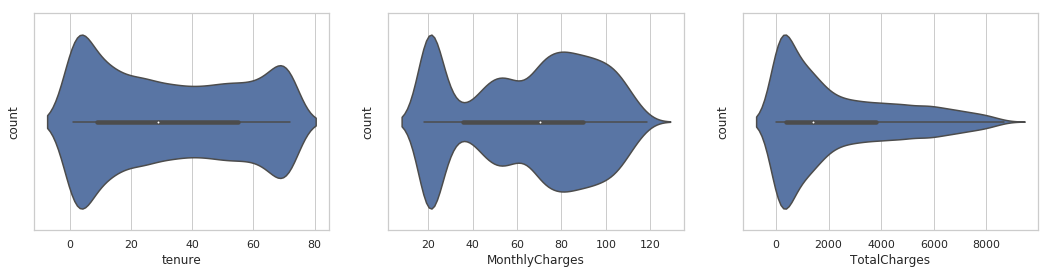

In [18]:
# Setting Seaborn Style to Whitegrid
sns.set(style="whitegrid")

# subplots (rows, columns, figsize (width, height))
fig, ax = plt.subplots(1,3, figsize=(18,4))

# Use onlyNumeric Dataframe (without SeniorCitizen) to specify the plotted columns
# Use seaborn violinplots to display the value-distribution of the numeric features
for column in df_onlyNumeric.drop('SeniorCitizen', axis=1):
    sns.violinplot(x=column, data=df, ax=ax[(df_onlyNumeric.columns.get_loc(column))-1]).set(ylabel="count")


## Observations
With the violinplots we can observe the value-disruption within the features in a more detailed way as with the descriptive statistic on its own. For example we can recognize a slightly rise of the population within the feature `MonthlyCharges` from about 37 to 80. 

#### Task 7: Understand data by univariate distribution visualisation - discrete variables
For the 16 non-numeric features visualize the value-distribution by applying *countplots* from *seaborn*. The 16 countplots shall be arranged in a (4x4)-grid.

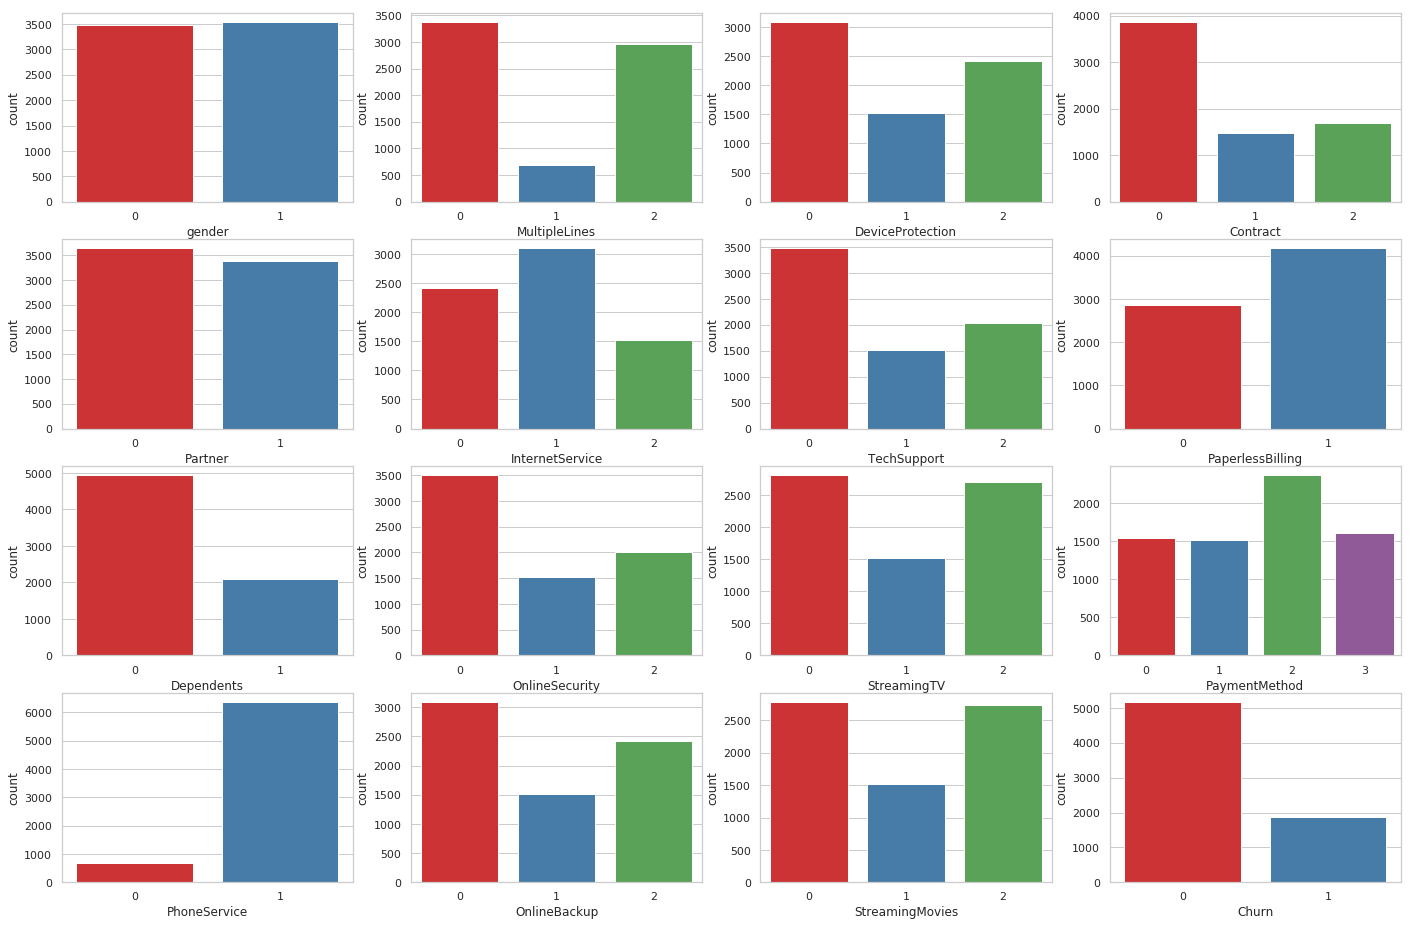

In [19]:
fig, ax = plt.subplots(4,4, figsize=(24, 16))

#initialize row and col values for 
row = 0
col = 0

# Countplot for each column in Dataframe (without the numeric Datatypes) 
# Use Palette="Set1" to color 
for column in df.drop(['tenure','MonthlyCharges','TotalCharges','SeniorCitizen'], axis=1):
    sns.countplot(x = df[column], ax=ax[col, row], palette="Set1")
    
    # Placement of Countplot
    if (col<3): 
        col = col + 1
    else:
        col = 0
        row = row + 1

## Observations

* **Gender:**
In the graph we can recognize no significant difference between male and female.
* **MultipleLines:**
In the second graph we can see, that most of the persons have no multiple lines or even have no phone service at all. Only a few persons have multiple lines. 
* **DeviceProtection:** 
The graph showes us nearly the same disruption within the data. Only the feature 1 is higher than in the previous graph.
* **Contract:**
As we can observe from the graph, most of the persons have month-to-moth conracts (round 4000). However, only 1500 people have a one year contract and just 1600 have a two year contract.
* **Partner:**
This graph showes no significant difference between the several features.
* **InternetService:**
As shown in this graph, most of the persons have a fiber optic internet (3100), followed by 2400 persons with DSL. 1500 persons have no internet service at all.
* **TechSupport:**
3500 persons have no tech support and  2000 no internet service. Whereas 1500 have tech support.
* **PaperlessBilling:** 
Today, less than half of the persons pay paperless.
* **Dependents:**
More than twice as many persons have dependents (5000). 
* **OnlineSecurity:**
Most of the persons use no online security (3500) or even have no internet service (1500). Only 2000 of the persons use online security. 
* **StreamingTV:**
Around 2800 people do not use streaming services, while another 1500 have no internet access at all and therefore do not use streaming. Nevertheless, 2600 people use the TV streaming service.
* **PaymentMethod:**
The diagram shows that the payment methods Bank transfer (automatic), Credit card (automatic) and Mailed check are almost equally pronounced. The most common payment method is Electronic check.
* **PhoneService:**
As can be seen in the diagram, almost all people use a the offered phone service. Only a minority uses no phone service.
* **OnlineBackup:**
The majority of people (4000) do not use online backup. However, 1500 have no internet service. There are 3000 people who use the online backup service.
* **StreamingMovies:**
This graph shows almost the same characteristics as the graph before. However, there are more people here who do not use the streaming offer. 
* **Churn:**
The diagramm shows us that around 28% percent of the persons are churning.

#### Task 8: Understand data by conditional distribution visualisation
Repeat the distribution-visualisations of the two previous tasks. However, now for each variable the distribution in class `churn=0` and in class `churn=1` shall be calculated separately. Apply seaborn's *FacetGrid*-class for this. Are there features for which the distributions in the 2 classes are significantly different? If yes: Which ones? For columns with significant different distributions in the two classes:  Do you expect these features to be informative with respect to the classification task? Why? 

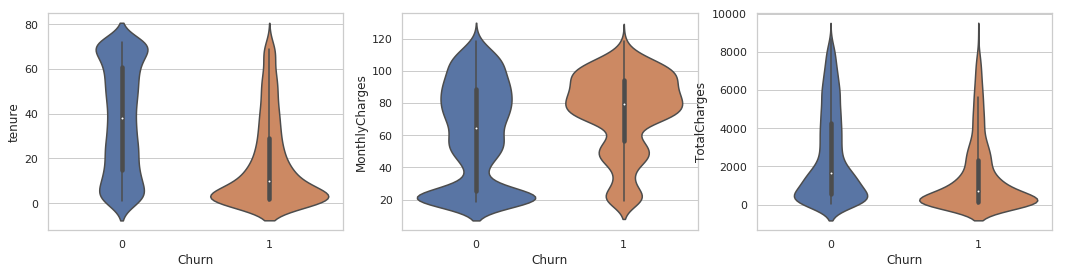

In [20]:
fig, ax = plt.subplots(1,3, figsize=(18,4))

for columns in df_onlyNumeric.drop('SeniorCitizen', axis=1):
    sns.violinplot(x="Churn", y=columns, data=df, ax=ax[(df_onlyNumeric.columns.get_loc(columns))-1])

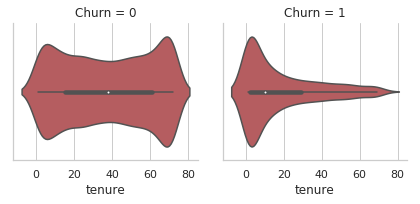

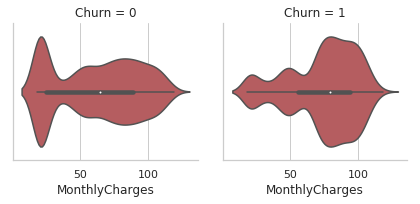

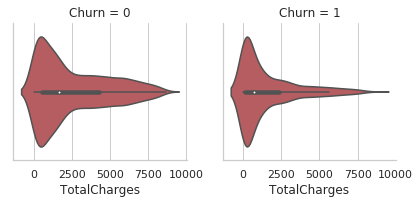

In [21]:
for columns in df_onlyNumeric.drop('SeniorCitizen', axis=1):
    g = sns.FacetGrid(df, col="Churn")
    g = g.map(sns.violinplot, columns, color="r", order=None)


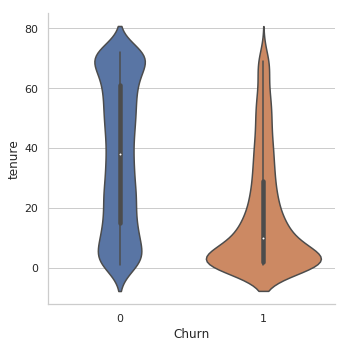

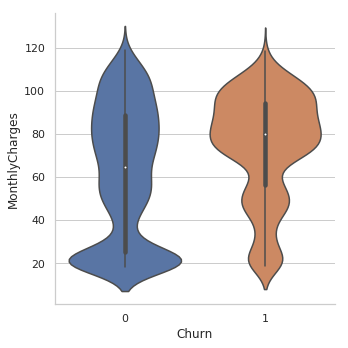

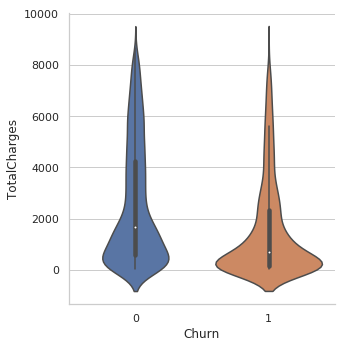

In [22]:
for columns in df_onlyNumeric.drop('SeniorCitizen', axis=1):
    sns.catplot(y=columns, x="Churn", data=df, kind="violin")


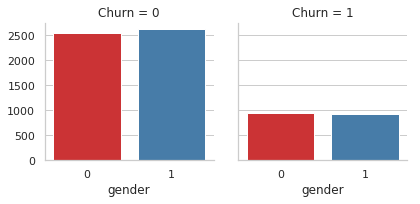

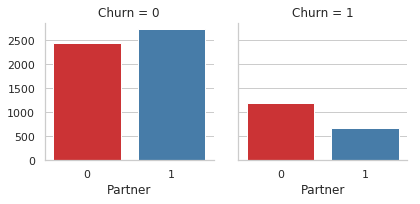

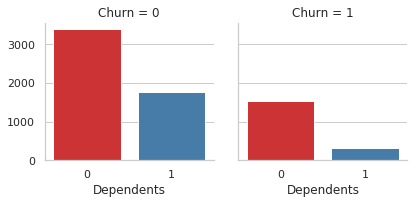

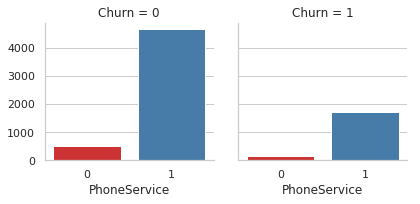

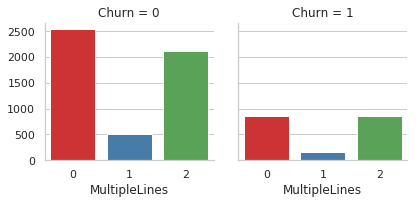

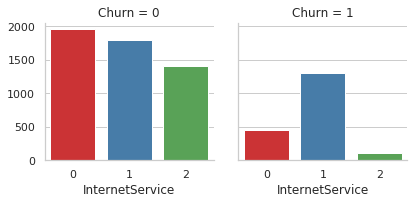

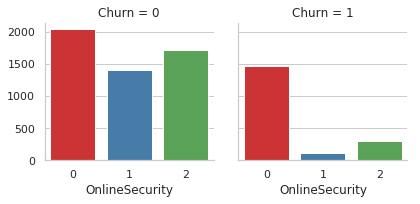

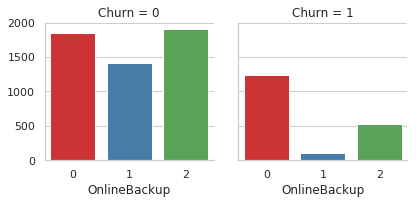

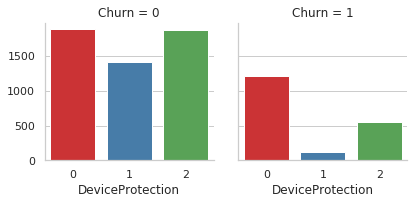

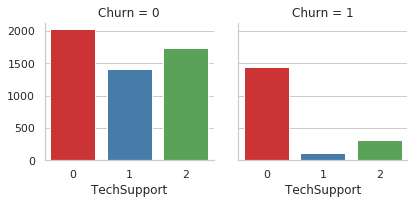

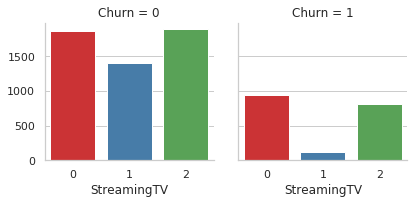

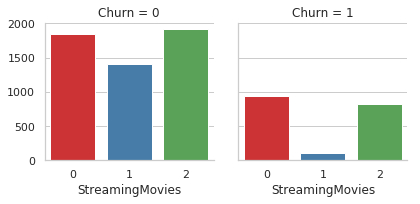

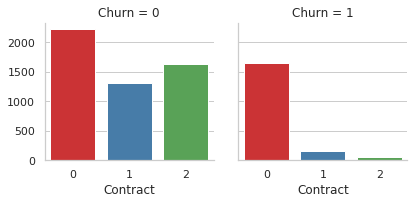

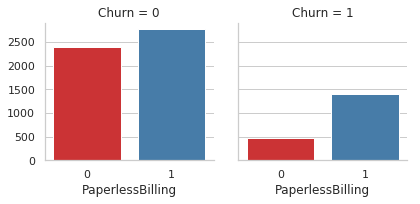

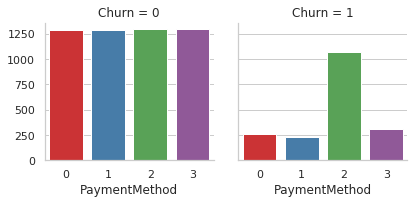

In [23]:
for columns in df.drop(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen','Churn'], axis=1):
    g = sns.FacetGrid(df, col="Churn")
    g = g.map(sns.countplot, columns, palette="Set1", order=None)

## Observations

The advantage of violine plots are you can get several information from it. So you can get the ranking of the groups and their distribution. As you can see there several ways to visualize the data as violine plots.

In this case we choosed for features with =2 characteristics and based on numerical data violinplots and for features with >2 chracteristics and non-numeric based data we choosed countplots.

In the violine plots it can be seen that, the feature 'MonthlyCharges' is most siginificant, it's because for churn = 0 and 1 there is a complte shift of the distribution.


As in it shown in the countplots there are some with no difference. And some of them has a difference, but their basicly has a big difference in the distribution. But there are also some features what is interesting. So 'Internet Service', 'Online Scurity' and 'Online Backup' has a significantly difference between churn = 0 and 1. In all cases churn = 1 is more concerned and this means they are also good for the classification task, it's because it's help the algorithm to result a clearer result.

---> Take Mean Value of Graphs per Churn class to show more precise Visualization of Significance



#### Task 9: Understand data by correlation-analysis
Use the pandas-dataframe method `corr()` for calculating the pairwise correlations of all columns. Visualize the calculated pairwise correlations by applying seaborn's `heatmap()`.

* For the calculation of the correlation we use spearman's correaltion coefficient.

In [24]:
corr = df.corr(method="spearman") 

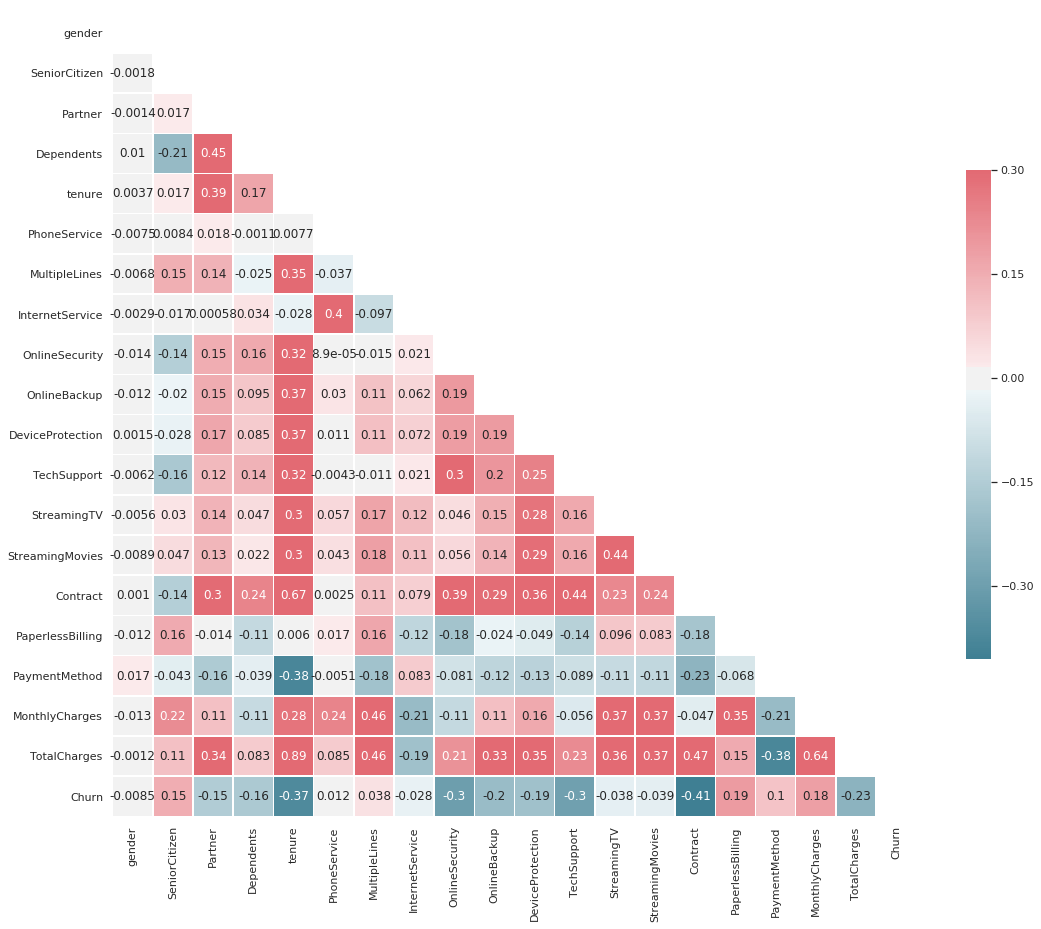

In [25]:
#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Observations

The interpretation of the correlation strength of the features is listed below.

* **Churn - Gender:**
A very weak and negative correlation.
* **Churn - SeniorCitizen:**
A very weak correlation.
* **Churn - Partner:**
A very weak and negative correlation.
* **Churn - Dependents:**
A very weak and negative correlation.
* **Churn - Tenure:**
A weak and negative correlation.
* **Churn - PhoneService:**
A very weak correlation.
* **Churn - MultipleLines:**
A very weak correlation.
* **Churn - InternetService:**
A very weak and negative correlation.
* **Churn - OnlineSecurity:**
A weak and negative correlation.
* **Churn - OnlineBackup:**
A weak and negative correlation.
* **Churn - DeviceProtection:**
A very weak and negative correlation.
* **Churn - TechSupport:**
A weak and negative correlation.
* **Churn - StreamingTV:**
A very weak and negative correlation.
* **Churn - StreamingMovies:**
A very weak and negative correlation.
* **Churn - Contract:**
A moderate and negative correlation.
* **Churn - PaperlessBilling:**
A very weak correlation.
* **Churn - PaymentMethod:**
A very weak correlation.
* **Churn - MonthlyCharge:**
A very weak correlation.
* **Churn - TotalCharge:**
A weak and negative correlation.

The features with the strongest correlation are `Contract`, `tenure`, `TechSupport`, `OnlineSecurity`, `TotalCharge` and `OnlineBackup`.

### Task 10: Univariate Feature Selection
Goal of univariate feature selection is to select a set of most informative features, based on univariate statistical tests. In scikit-learn the following tests are available:
* **Regression:** [Mutual Information for Regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression), [f-measure for regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)
* **Classification:** [Mutual Information for Classification](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif), [$\chi^2$-test](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [f-measure for classification](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif).

For unsupervised learning for example the [sklearn.feature_selection.VarianceThreshold class](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold) can be applied. This method just analysis the variance of a single feature and does not require a class-label or regression target-value.

**Subtasks:**
* Calculate feature importance of all features in the churn-prediction data w.r.t. to all 3 feature importance tests for classification. Display the results in a single dataframe, whose rows are the features and whose columns are the distinct feature-importance-tests. For $\chi^2$ and F-measure the value of the test and it's p-value shall be contained in this dataframe. 
* Discuss the result.
* Apply scikit-learn's method `selectKBest()` for extracting the $k=8$ most relevant features with respect to *mutual information*

In [26]:
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif, SelectKBest

In [27]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [28]:
# Estimated mutual information between each feature and the target
score = mutual_info_classif(X,y)
print(np.round(score,2))

[0.01 0.01 0.01 0.02 0.08 0.01 0.   0.06 0.06 0.05 0.04 0.06 0.04 0.03
 0.09 0.03 0.04 0.05 0.04]


In [29]:
chi_2, p_value_chi2 = chi2(X,y)
print('chi2: ', np.round(chi_2,2))
print('p-value:', np.round(p_value_chi2,2))

chi2:  [2.5000000e-01 1.3348000e+02 8.1860000e+01 1.3127000e+02 1.6377330e+04
 9.0000000e-02 9.7400000e+00 9.7200000e+00 5.5044000e+02 2.2944000e+02
 1.9069000e+02 5.2216000e+02 7.3700000e+00 8.3600000e+00 1.1117600e+03
 1.0498000e+02 5.9240000e+01 3.6530700e+03 6.2963081e+05]
p-value: [0.61 0.   0.   0.   0.   0.76 0.   0.   0.   0.   0.   0.   0.01 0.
 0.   0.   0.   0.   0.  ]


In [30]:
f_value, p_value_f = f_classif(X,y)
print("f-value:",np.round(f_value,2))
print('p-value:', np.round(p_value_f,2))

f-value: [5.10000e-01 1.63010e+02 1.61780e+02 1.92190e+02 1.00751e+03 9.60000e-01
 1.01900e+01 1.56300e+01 6.40900e+02 2.78740e+02 2.29720e+02 6.08440e+02
 9.28000e+00 1.06000e+01 1.30862e+03 2.67490e+02 8.27400e+01 2.71580e+02
 2.91340e+02]
p-value: [0.47 0.   0.   0.   0.   0.33 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


In [31]:
ufs_df = pd.DataFrame(np.round([score,chi_2,p_value_chi2,f_value,p_value_f],2), columns=X.columns,
                      index=['mi Score', 'Chi2', 'p-value Chi2','f_value', 'p-value f' ])
ufs_df = ufs_df.transpose()
ufs_df

,mi Score,Chi2,p-value Chi2,f_value,p-value f
gender,0.01,0.25,0.61,0.51,0.47
SeniorCitizen,0.01,133.48,0.00,163.01,0.00
Partner,0.01,81.86,0.00,161.78,0.00
Dependents,0.02,131.27,0.00,192.19,0.00
tenure,0.08,16377.33,0.00,1007.51,0.00
PhoneService,0.01,0.09,0.76,0.96,0.33
MultipleLines,0.00,9.74,0.00,10.19,0.00
InternetService,0.06,9.72,0.00,15.63,0.00
OnlineSecurity,0.06,550.44,0.00,640.90,0.00
OnlineBackup,0.05,229.44,0.00,278.74,0.00


*Note*: 

- MI Score --> dependency (same as above) 
- Interesting are pvalues
- Chi2 and f value just for coputing the pvalues

In [32]:
X_new = SelectKBest(mutual_info_classif, k=8).fit(X, y)

cols = X_new.get_support(indices=True)
new_feature = X.columns[cols]
new_feature

Index(['tenure', 'InternetService', 'OnlineSecurity', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

### Task 11: Transform Data: One-Hot Encoding
The following picture displays the different data types:
![data types](../data/Pics/dataTypes.png)


Non-binary nominal data should be one-hot encoded. Determine all columns with non-binary nominal data and transform the feature-array of the churnPrediction-dataframe (with all features) into acversion, in which non-binary nominal features are one-hot encoded. 

In [33]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


As we can see by the `describe` method, we can split the data in different subcategories by the different datatypes.

**1. Numerical Data:**
* tenure
* Monthly Charges
* Total Charges

*are all numerical datatypes*

**2. Categorical - Binary**
* gender
* SeniorCitizen
* Partner
* Dependents
* PhoneService
* PaperlessBilling
* Churn

*are all Binary Categorical Datatypes*

**3. Categorical - Non Binary**
* MultipleLines
* InternetService
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* StreamingTV
* StreamingMovies
* Contract
* PaymentMethod

*are all Non-Binary Categorical Datatypes*

For the 3rd subdivision, we need to one-hot encode the data:

In [34]:
#Create Dataframe with only categorical features
categorical_nBinary_features=df[['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract','PaymentMethod']]

In [35]:
#show categorical_features Dataframe
categorical_nBinary_features.head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,1,0,0,2,0,0,0,0,0,2
1,0,0,2,0,2,0,0,0,1,3
2,0,0,2,2,0,0,0,0,0,3
3,1,0,2,0,2,2,0,0,1,0
4,0,1,0,0,0,0,0,0,0,2


In [36]:
#create new dataframe from original Dataframe (all columns)
# for each column in Categorical Features Dataframe - Do a Onehot Encoding & Drop the original Column
df_onehot=df
for columns in categorical_nBinary_features:
    df_onehot=pd.concat([df_onehot,pd.get_dummies(df_onehot[columns],prefix=columns)],axis=1).drop([columns],axis=1)

In [37]:
df_onehot.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


### Task 12: Transform data: Scaling
Except decision trees and ensemble methods, which contain decision trees, nearly all machine learning algorithms require features of similar scale at the input. Since the value ranges of practical data can be very different a corresponding scaling must be performed in the preprocessing chain. The most common scaling approaches are *normalization (MinMax-scaling)* and *standardization*.

**Normalization:** In order to normalize feature *x* it's minimum $x_{min}$ and maximum $x_{max}$ must be determined. Then the normalized values $x_n^{(i)}$ are calculated from the original values $x^{(i)}$ by  
$$x_n^{(i)}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}.$$
The range of normalized values is $[0,1]$. A problem of this type of scaling is that in the case of outliers the value range of non-outliers may be very small. 

**Standardization:** In order to standardize feature *x* it's mean value $\mu_x$ and standard deviation $\sigma_x$ must be determined. Then the standardized values $x_s^{(i)}$ are calculated from the original values $x^{(i)}$ by
$$x_s^{(i)}=\frac{x^{(i)}-\mu_x}{\sigma_x}$$
All standardized features have zero mean and a standard deviation of one.

Calculate 
* a normalized
* a standardized 

representation of the feature-array of the churn-prediction data (from the original data, without features-selection and one-hot encoding).

In [38]:
# Normalization
normalized_df_onehot=(df_onehot-df_onehot.min())/(df_onehot.max()-df_onehot.min())

normalized_df_onehot.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
#Standadization
standardized_df_onehot=(df_onehot-df_onehot.mean())/df_onehot.std()
standardized_df_onehot.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,-1.009358,-0.440296,1.035543,-0.652259,-1.280157,-3.056117,0.828880,-1.161611,-0.994123,-0.601621,...,1.236272,-0.525093,-0.796793,0.902549,-0.514500,-0.561324,-0.529938,-0.525313,1.404664,-0.543565
1,0.990588,-0.440296,-0.965539,-0.652259,0.064298,0.327166,-1.206275,-0.260859,-0.173727,-0.601621,...,1.236272,-0.525093,-0.796793,-1.107816,1.943357,-0.561324,-0.529938,-0.525313,-0.711813,1.839445
2,0.990588,-0.440296,-0.965539,-0.652259,-1.239416,0.327166,0.828880,-0.363897,-0.959581,1.661941,...,1.236272,-0.525093,-0.796793,0.902549,-0.514500,-0.561324,-0.529938,-0.525313,-0.711813,1.839445
3,0.990588,-0.440296,-0.965539,-0.652259,0.512450,-3.056117,-1.206275,-0.747797,-0.195234,-0.601621,...,1.236272,-0.525093,-0.796793,-1.107816,1.943357,-0.561324,1.886745,-0.525313,-0.711813,-0.543565
4,-1.009358,-0.440296,-0.965539,-0.652259,-1.239416,0.327166,0.828880,0.196164,-0.940391,1.661941,...,1.236272,-0.525093,-0.796793,0.902549,-0.514500,-0.561324,-0.529938,-0.525313,1.404664,-0.543565


In [40]:
normalized_df_onehot.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,0.442560,0.903299,0.592719,0.463166,0.261309,0.265785,...,0.395478,0.216155,0.388367,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.491363,0.299363,0.261571,0.441782,...,0.488988,0.411650,0.487414,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.172512,0.044155,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.394366,1.000000,1.000000,0.518408,0.159090,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,0.712562,0.435719,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The Range of Values in the Normalized Dataframe go from **min:** 0 to **max:** 1 

In [41]:
standardized_df_onehot.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
count,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,...,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03
mean,-7.174137e-17,2.020884e-18,1.470193e-16,-1.010442e-17,-9.952853e-17,1.192321e-16,-5.986868e-17,-1.367128e-15,-1.718004e-15,8.689800e-17,...,-4.243856e-17,4.117551e-17,1.010442e-17,-7.654097e-17,3.486025e-17,-9.093977e-18,7.830925e-17,8.209840e-17,1.305996e-16,6.593133e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.009358e+00,-4.402958e-01,-9.655394e-01,-6.522585e-01,-1.280157e+00,-3.056117e+00,-1.206275e+00,-1.547173e+00,-9.989982e-01,-6.016206e-01,...,-8.087682e-01,-5.250931e-01,-7.967925e-01,-1.107816e+00,-5.145003e-01,-5.613245e-01,-5.299381e-01,-5.253134e-01,-7.118128e-01,-5.435649e-01
25%,-1.009358e+00,-4.402958e-01,-9.655394e-01,-6.522585e-01,-9.542285e-01,3.271661e-01,-1.206275e+00,-9.709078e-01,-8.301898e-01,-6.016206e-01,...,-8.087682e-01,-5.250931e-01,-7.967925e-01,-1.107816e+00,-5.145003e-01,-5.613245e-01,-5.299381e-01,-5.253134e-01,-7.118128e-01,-5.435649e-01
50%,9.905875e-01,-4.402958e-01,-9.655394e-01,-6.522585e-01,-1.394072e-01,3.271661e-01,8.288802e-01,1.845309e-01,-3.907873e-01,-6.016206e-01,...,-8.087682e-01,-5.250931e-01,-7.967925e-01,9.025485e-01,-5.145003e-01,-5.613245e-01,-5.299381e-01,-5.253134e-01,-7.118128e-01,-5.435649e-01
75%,9.905875e-01,-4.402958e-01,1.035543e+00,1.532916e+00,9.198605e-01,3.271661e-01,8.288802e-01,8.330889e-01,6.667797e-01,1.661941e+00,...,1.236272e+00,-5.250931e-01,1.254853e+00,9.025485e-01,-5.145003e-01,-5.613245e-01,-5.299381e-01,-5.253134e-01,1.404664e+00,-5.435649e-01
max,9.905875e-01,2.270878e+00,1.035543e+00,1.532916e+00,1.612459e+00,3.271661e-01,8.288802e-01,1.793254e+00,2.824061e+00,1.661941e+00,...,1.236272e+00,1.904153e+00,1.254853e+00,9.025485e-01,1.943357e+00,1.781247e+00,1.886745e+00,1.903355e+00,1.404664e+00,1.839445e+00


In the standardized Dataframe all **means = 0** (-4,89 e-16 = -0,000000000000000489)  
All Standard Deviations **std = 1**

### Task 13: Definition and Evaluation of multiple data mining processing chains 
The entire Data Mining process usually comprises a sequence of modules, e.g: 

*data access -> cleaning -> feature selection -> transformations -> modelling -> visualisation -> evaluation*

In scikit-learn such sequences of modules can comfortably be encapsulated within a single [Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline). As shown in the code-snippet below, a Pipeline-object can be configured as a sequence of other scikit-learn objects. The restriction is that all but the last module in a pipeline must be of **Transformer**-type. All *Transformers* have a `fit()` module for training and a `transform()`-method to transform data. The last module in the sequence is an **Estimator**-type. All *Estimators* have a `fit()`-method for training and a `predict()`-method to estimate an output for the given input data. The main benefits of the `Pipeline`-class are:

* For training the `fit()`-method must be envoked only once to fit a whole sequence of modules in the pipeline.
* After training the `predict()`-method must also be envoked only once per pipeline.
* Parameter optimisation, e.g. by Grid-Search can be performed over all parameters in the pipeline. 

Define multiple pipelines:
* All of them shall apply [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for classification. However, different pipes can be defined for different parameter settings of this classifier. In particular the parameter `class_weight` shall be varied. Describe the meaning of this parameter.
* Define pipes with and without normalization and scaling
* Define pipes with and without one-hot encoding
* Define pipes with and without feature-selection (`selectKBest`)

All of the pipes shall be trained with training data, which shall compris 70 percent of the entire data. The remaining 30% shall be applied for test. For all of the pipes
* the confusion matrix
* accuracy
* precision
* recall
* f1-measure

shall be determined. Display all results concisely. Which configuration yields the best result? 


## TURNING THE NEXT FEW CELLS TO RAW CELLS.
### New Implementation Method for Pipeline below

* Normalize nach Split Datensatz?

# Neuer Ansatz: Pipeline nicht in eine Funktion einfügen

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

### Use GridSearchCV for trying out different Parameters and finding the best ones very quickly
> [Watch this tutorial for infos on GridSearchCV](https://www.youtube.com/watch?v=GuW0Doiye8g)


In [43]:
#Convert all values to float64
pipelineData = pipelineData.astype('float64')


# Defining data X and label y from Dataframe (Pipeline Data is simply Label encoded -> No Scaling | One Hot Encoding)
X = pipelineData.drop('Churn', axis=1)
y = pipelineData['Churn']


In [44]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,1.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65


In [45]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

In [46]:
# Splitting Training-Set (70%) and Test-Set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [47]:
# For schleife für eine Liste von 
feature_select_iterations = [0,1]
onehot_iterations = [0,1]
scaler_iterations = [0,1,2]

#Initiating Pipeline Steps Array to be filled
pipeline_steps_array = []

# Filling Pipeline Steps Array with Pipeline_steps with each possible combination of Pipeline steps
for onehot_steps, scaler_steps, feature_steps in [(onehot_steps, scaler_steps, feature_steps) for onehot_steps in onehot_iterations for scaler_steps in scaler_iterations for feature_steps in feature_select_iterations]:
    pipeline_steps = []
    if feature_steps == 1:
        pipeline_steps.extend([('feature_select', SelectKBest(mutual_info_classif))])
    if scaler_steps == 1:
        pipeline_steps.extend([('standard_scaler',StandardScaler())])
    elif scaler_steps == 2:
        pipeline_steps.extend([('norm_scaler',Normalizer())])
    if onehot_steps == 1:
        pipeline_steps.extend([('onehot', OneHotEncoder(handle_unknown='ignore'))])
    pipeline_steps.extend([('classifier', LogisticRegression(solver='lbfgs', max_iter=25000))])
    pipeline_steps_array.extend([pipeline_steps])
    
    
    

In [48]:
#Print out how many different pipeline combinations have been setup with their steps.
len(pipeline_steps_array)

12

In [49]:
# Initialize an empty pipelines array to be filled with pipelines according to the pipeline_steps_array
pipelines = []

# Creating a new Pipeline for each combination possibility in pipeline_steps_array
for pipeline_steps in pipeline_steps_array:
    pipelines.append(Pipeline(steps=pipeline_steps))

# THE FOLLOWING STEP TAKES UP QUITE SOME TIME, SINCE IT IS ITERATING THROUGH 12 x 3 x 4 x 2 x 3 x 2 x 3 = 5184 POSSIBLE PIPELINES

* should probably improve the parameters "such as class_weight" -> give a specific class weight list | or remove some parameters like solver | C 

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

grid_search_array = []

for pipeline in pipelines:
    pipeline.fit(X_train,y_train)
    # print(pipeline.score(X_test,y_test))
    
    pipeline_parameters = {
        #'classifier__solver': ('lbfgs', 'sag', 'newton-cg'),
        #'classifier__C':(0.1, 0.5, 1),
        'classifier__class_weight':('balanced',None) # Should probably add a class-weight list
    }

   
    # Modify Parameters for pipeline.named_steps
    if ('feature_select' in pipeline.named_steps):
        pipeline_parameters.update({'feature_select__k':(8,10)})
    #if('standard_scaler' in pipeline.named_steps):
    #    pipeline_parameters.update({'standard_scaler__with_mean': (False, True)})
    if('norm_scaler' in pipeline.named_steps):
        #pipeline_parameters.update({'norm_scaler__norm':('l1','l2','max')})
        pipeline_parameters.update({'norm_scaler__norm':('l1','l2')})
    
    # Makes no sense to modify parameters for one hot encoding
    #if('onehot' in pipeline.named_steps);
    #    pipeline_parameters.update('')
    
    
    grid_search_forPipe = GridSearchCV(pipeline, pipeline_parameters, cv=5, verbose=2)
    grid_search_forPipe.fit(X_train,y_train)
    grid_search_array.append(grid_search_forPipe)
    
    
    

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.0s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.0s
[CV] classifier__class_weight=balanced ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ classifier__class_weight=balanced, total=   0.2s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.2s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.1s
[CV] classifier__class_weight=None ...................................
[CV] .................... classifier__class_weight=None, total=   0.1s
[CV] classifier__class_weight=None ...................................
[CV] .................... classifier__class_weight=None, total=   0.2s
[CV] classifier__class_weight=None ...................................
[CV] .................... classifier__class_weight=None, total=   0.2s
[CV] classifier__class_weight=None ...................................
[CV] .................... classifier__class_weight=None, total=   0.2s
[CV] classifier__class_weight=None ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.6s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........
[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........
[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.6s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........
[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.6s
[CV] classifier__class_weight=balanced, feature_select__k=10 .........
[CV]  classifier__class_weight=balanced, feature_select__k=10, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=10 .........
[CV]  classifier__class_weight=balanced, feature_select__k=10, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=10 .........
[CV]  classifier__class_weight=balanced, feature_select__k=10, total=   0.6s
[CV] classifier__class_weight=balanced,

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.4s finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.0s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.0s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.0s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.0s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.0s
[CV] classifier__class_weight=None ...................................
[CV] .................... classifier__class_weight=None, total=   0.0s
[CV] classifier__class_weight=None ...................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... classifier__class_weight=None, total=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.6s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.8s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........
[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........
[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.8s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........
[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=10 .........
[CV]  classifier__class_weight=balanced, feature_select__k=10, total=   0.6s
[CV] classifier__class_weight=balanced, feature_select__k=10 .........
[CV]  classifier__class_weight=balanced, feature_select__k=10, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=10 .........
[CV]  classifier__class_weight=balanced, feature_select__k=10, total=   0.8s
[CV] classifier__class_weight=balanced,

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.1s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] classifier__class_weight=balanced, norm_scaler__norm=l1 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l1, total=   0.0s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l1 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l1, total=   0.0s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l1 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l1, total=   0.0s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l1 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l1, total=   0.0s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l1 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier__class_weight=balanced, norm_scaler__norm=l1, total=   0.1s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l2 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l2, total=   0.0s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l2 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l2, total=   0.0s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l2 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l2, total=   0.0s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l2 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l2, total=   0.0s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l2 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l2, total=   0.0s
[CV] classifier__class_weight=None, norm_scaler__norm=l1 .............
[CV]  classifier__class_weight=None, norm_scaler__norm=l1, total=   0.0s
[CV] classifier__class_weight=None, nor

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1, total=   0.8s
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1 
[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1, total=   0.8s
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1 
[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1 
[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1, total=   0.8s
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l2 
[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l2, total=   0.9s
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l2 
[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l2, total=   0.

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   27.8s finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] classifier__class_weight=balanced ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ classifier__class_weight=balanced, total=   0.3s
[CV] classifier__class_weight=balanced ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................ classifier__class_weight=balanced, total=   0.5s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.4s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.4s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.3s
[CV] classifier__class_weight=None ...................................
[CV] .................... classifier__class_weight=None, total=   0.3s
[CV] classifier__class_weight=None ...................................
[CV] .................... classifier__class_weight=None, total=   0.3s
[CV] classifier__class_weight=None ...................................
[CV] .................... classifier__class_weight=None, total=   0.4s
[CV] classifier__class_weight=None ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.0s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   1.0s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.8s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........
[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........
[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........
[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.6s
[CV] classifier__class_weight=balanced, feature_select__k=10 .........
[CV]  classifier__class_weight=balanced, feature_select__k=10, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=10 .........
[CV]  classifier__class_weight=balanced, feature_select__k=10, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=10 .........
[CV]  classifier__class_weight=balanced, feature_select__k=10, total=   0.7s
[CV] classifier__class_weight=balanced,

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.6s finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] classifier__class_weight=balanced ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ classifier__class_weight=balanced, total=   0.3s
[CV] classifier__class_weight=balanced ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................ classifier__class_weight=balanced, total=   0.3s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.4s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.3s
[CV] classifier__class_weight=balanced ...............................
[CV] ................ classifier__class_weight=balanced, total=   0.3s
[CV] classifier__class_weight=None ...................................
[CV] .................... classifier__class_weight=None, total=   0.3s
[CV] classifier__class_weight=None ...................................
[CV] .................... classifier__class_weight=None, total=   0.4s
[CV] classifier__class_weight=None ...................................
[CV] .................... classifier__class_weight=None, total=   0.3s
[CV] classifier__class_weight=None ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.3s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.8s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........
[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........
[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=8 ..........
[CV]  classifier__class_weight=balanced, feature_select__k=8, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=10 .........
[CV]  classifier__class_weight=balanced, feature_select__k=10, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=10 .........
[CV]  classifier__class_weight=balanced, feature_select__k=10, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=10 .........
[CV]  classifier__class_weight=balanced, feature_select__k=10, total=   0.7s
[CV] classifier__class_weight=balanced,

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.4s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] classifier__class_weight=balanced, norm_scaler__norm=l1 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__class_weight=balanced, norm_scaler__norm=l1, total=   0.5s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l1 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  classifier__class_weight=balanced, norm_scaler__norm=l1, total=   0.5s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l1 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l1, total=   0.5s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l1 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l1, total=   0.5s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l1 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l1, total=   0.6s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l2 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l2, total=   0.5s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l2 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l2, total=   0.5s
[CV] classifier__class_weight=balanced, norm_scaler__norm=l2 .........
[CV]  classifier__class_weight=balanced, norm_scaler__norm=l2, total=   0.5s
[CV] classifier__class_weight=balan

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   10.8s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1, total=   0.8s
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1 
[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1, total=   0.8s
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1 
[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1, total=   0.8s
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1 
[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l1, total=   0.7s
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l2 
[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l2, total=   0.8s
[CV] classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l2 
[CV]  classifier__class_weight=balanced, feature_select__k=8, norm_scaler__norm=l2, total=   0.

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   31.7s finished


In [51]:
len(grid_search_array)

12

In [52]:
data_holder = np.array
for grid_search in grid_search_array:
    pipeline_name = "This pipeline contains the following steps: \n"
    grid_predictions = grid_search.best_estimator_.predict(X_test)
    
    if('feature_select' in grid_search.best_estimator_.named_steps):
        pipeline_name += "| Feature Selection |"
        
    if('standard_scaler' in grid_search.best_estimator_.named_steps):
        pipeline_name += "| Standardization |"
        
    if('norm_scaler' in grid_search.best_estimator_.named_steps):
        pipeline_name += "| Normalization |"
        
    if('onehot' in grid_search.best_estimator_.named_steps):
        pipeline_name += "| One Hot encoding |"
    
    

    
    print(pipeline_name)
    print('\nThese are the optimal parameters for this pipeline: ')
    print(grid_search.best_params_)
    print('\nAccuracy:')
    print(grid_search.best_estimator_.score(X_test,y_test))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test,grid_predictions))
    print('\n')
    print(classification_report(y_test,grid_predictions))
    print('======================================================================================')

This pipeline contains the following steps: 


These are the optimal parameters for this pipeline: 
{'classifier__class_weight': None}

Accuracy:
0.809478672985782

Confusion Matrix:
[[1408  155]
 [ 247  300]]


              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      1563
         1.0       0.66      0.55      0.60       547

   micro avg       0.81      0.81      0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110

This pipeline contains the following steps: 
| Feature Selection |

These are the optimal parameters for this pipeline: 
{'classifier__class_weight': None, 'feature_select__k': 10}

Accuracy:
0.7995260663507109

Confusion Matrix:
[[1384  179]
 [ 244  303]]


              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1563
         1.0       0.63      0.55      0.59       547

   micro avg       0.80      0.80     

# We should probably visualize the results

# We should probably discuss the results

## Conclusion

Text for Conclusion

## References

<sup>[1]</sup> [Pandas - Read_CSV](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)  
<sup>[2]</sup> [Shane Lynn Blog - Python Pandas read_csv – Load Data from CSV Files](https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/)  
<sup>[3]</sup> [Pandas - drop](https://stackoverflow.com/questions/34243194/filter-rows-of-pandas-dataframe-whose-values-are-lower-than-0)  
<sup>[4]</sup> [DataFrame - select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)  
<sup>[5]</sup> [Seaborn - Violinplots Documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html)  
<sup>[6]</sup> [Seaborn - Countplot Documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)  
<sup>[7]</sup> [Seaborn - ColorPalette](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)  
<sup>[8]</sup> [Seaborn - FacetGrid](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=s)  
<sup>[9]</sup> [Matplotlib Pyplot - Subplots Documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)  
<sup>[10]</sup> [Stack Overflow - Increase Plot Size](https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)  
<sup>[11]</sup> [Seaborn - Catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)  
<sup>[12]</sup> [Pandas - Correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)  
<sup>[13]</sup> [Seaborn - Correlation Matrix](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)  
<sup>[14]</sup> [Machine Learning Tutorial - Dummy Variables & One Hot Encoding - `Youtube`](https://www.youtube.com/watch?v=9yl6-HEY7_s)  
<sup>[15]</sup> [One Hot Encoding with Pandas Dummy Variables](http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)  
<sup>[16]</sup> [ColumnTransformer](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py)  
<sup>[17]</sup> [Normalization & Standardization of Pandas Dataframes - Stackoverflow](https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame)  
<sup>[18]</sup> [Looping through multiple List Elements](https://www.oreilly.com/library/view/python-cookbook/0596001673/ch01s15.html)  
<sup>[19]</sup> [Pipeline and Grid Search in sklearn - `Youtube`](https://www.youtube.com/watch?v=GuW0Doiye8g)  
<sup>[20]</sup> [Udemy Course: Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/)  
<sup>[21]</sup> [Scikit Learn - Pipelining: Putting it all together](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html)